# Assignment 1: k-Nearest Neighbors

Fill in your name and student ID here.
- Name: Lim Fang Jun
- Student ID: A0276173Y

## Overview

In this assignment, we'll implement KNN step-by-step:

1. **Euclidean Distance:** Measure similarity between data points.
2. **Find Neighbors:** Select the 'K' closest points to a query point.
3. **Predict (Classification and Regression):** Use majority vote from neighbors and average of neighbors' values.
4. **Build KNN Class:** Combine everything into a reusable class.
5. **Practical**: Train a KNN classifier on the training dataset using scikit-learn.

By the end, you'll understand how KNN works and how it makes predictions based on distance. Let’s dive in!

## Instructions

1. Fill in your name and student ID at the top of the ipynb file.
2. The parts you need to implement are clearly marked with the following:

    ```
    """ YOUR CODE STARTS HERE """

    """ YOUR CODE ENDS HERE """
    ```

    , and you must **ONLY** write your code in between the above two lines. 
3. **IMPORTANT**: Make sure that all of the cells are runnable and can compile without exception, even if the answer is incorrect. This will significantly help us in grading your solutions.
3. For task 1 to 4, you are only allowed to use basic Python functions in your code (no `NumPy` or its equivalents), unless otherwise stated. You may reuse any functions you have defined earlier. If you are unsure whether a particular function is allowed, feel free to ask any of the TAs.
4. For task 5, you may use the `scikit-learn` library.
5. Your solutions will be evaluated against a set of hidden test cases to prevent hardcoding of the answer. You may assume that the test cases are always valid and does not require exception or input mismatch handling. Partial marks may be given for partially correct solutions

### Submission Instructions
Items to be submitted:
* **This notebook, NAME-STUID-assignment1.ipynb**: This is where you fill in all your code. Replace "NAME" with your full name and "STUID" with your student ID, which starts with "A", e.g. `"John Doe-A0123456X-assignment1.ipynb"`

Submit your assignment by **Sunday, 31 August 23:59** to Canvas. Points will be deducted late submission.


## Task 1 - Compute Euclidean Distance [1 Point]

To find the nearest neighbors, we first need a distance measure to determine how **close** two data points are. 

A possible distance measure is **Euclidean distance**—the straight-line distance between points $\mathbf{p} = [p_1, p_2, ..., p_m]$ and $\mathbf{q} = [q_1, q_2, ..., q_m]$ in $m$ dimensions:

$$
d_\text{euclidean}(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{m} (p_i - q_i)^2}
$$

Implement the function calculating euclidean distance using `math.sqrt()`, without the use of `numpy`.

In [ ]:
# TASK 1
import math 

def euclidean_distance(vec_p, vec_q):
    """
    TODO: Write a function to compute distance between two vectors.
    Call the math.sqrt() function to compute the square root of the sum of squared differences.

    Args:
        vec_p: List or tuple p, with a list of m numbers
        vec_q: List or tuple q, with a list of m numbers

    Returns:
        A float representing the Euclidean distance between the two vectors
    """

    distance = 0

    """ YOUR CODE STARTS HERE """    
    
    for i in range(0, len(vec_p), 1):
        s = vec_p[i] - vec_q[i]
        d = s**2
        distance += d
        
    distance = math.sqrt(distance)
    
    """ YOUR CODE ENDS HERE """

    return distance


# TESTCASES 1
assert math.isclose(euclidean_distance([1, 2, 3], [4, 5, 6]), 5.196152422706632, rel_tol=1e-5)
assert math.isclose(euclidean_distance([5.5, 5.5], [5.5, 5.5]), 0.0, rel_tol=1e-5)
assert math.isclose(euclidean_distance([-6], [-6]), 0.0, rel_tol=1e-5)
print('All test cases passed!') 

All test cases passed!


## Task 2 - Get the K Nearest Neighbors [1 Point]

Now that we can measure distance, let’s use that to find the ```k``` closest training points to a given test point. If there are multiple points with the same distance, we keep the ones that appear first in the training data.

In [8]:
# TASK 2
def get_k_nearest_neighbors(training_data, test_point, k):
    """
    TODO: Return the k nearest neighbors to the test_point.

    Args:
        training_data: list of tuples [(feature_vector, label), ...]
        test_point: list of numbers (the point we're classifying)
        k: number of neighbors to consider
        
    Returns:
        list of labels of the k nearest neighbors in the correct order
    """

    k_neighbors = []
    
    """ YOUR CODE STARTS HERE """ 
    
    l = list() 
    for i in range(0, len(training_data), 1):
        distance = euclidean_distance(test_point, training_data[i][0])
        label = training_data[i][1]
        l.append((distance, label))
        
    l = sorted(l, key = lambda x: x[0])
    
    for j in range(0, k, 1):
        k_neighbors.append(l[j][1])
        
    """ YOUR CODE ENDS HERE """

    return k_neighbors

# TESTCASES 2.1
training_data = [
    ([1, 2], 'A'),
    ([2, 3], 'B'),
    ([3, 4], 'A'),
    ([5, 5], 'B')
]

assert get_k_nearest_neighbors(training_data, [1.5, 2.5], k=2) == ['A', 'B']
assert get_k_nearest_neighbors(training_data, [4, 4], k=1) == ['A']
assert get_k_nearest_neighbors(training_data, [0, 0], k=3) == ['A', 'B', 'A']
print('All test cases passed!') 


All test cases passed!


## Task 3 - Prediction [2 Points]

### Task 3.1 - Compute Majority Voting [1 Point]

Once we have the `k` nearest neighbors, we need to decide the final label, which is the label that appears the most frequently. If there is a tie, return the label that appears first in the input list.

In [13]:
# TASK 3.1
def knn_majority_vote(neighbors):
    """
    TODO: Return the most common label in neighbors.

    Args:
        neighbors: list of labels

    Returns:
        The label that appears most frequently
        If there's a tie, return the label that appears first
    """
    
    most_common_label = None
    
    """ YOUR CODE STARTS HERE """ 
    
    d = dict()
    for i in range(0, len(neighbors), 1):
        l = neighbors[i]
        if l not in d:
            d[l] = 0
        
        d[l] += 1
    
    max = 0
    for key, value in d.items():
        if value > max:
            max = value
            most_common_label = key
        
    
    """ YOUR CODE ENDS HERE """ 

    return most_common_label

# TESTCASES 3.1
assert knn_majority_vote(['A', 'B', 'A']) == 'A'
assert knn_majority_vote(['B', 'B', 'A']) == 'B'
assert knn_majority_vote(['A', 'A', 'A']) == 'A'
assert knn_majority_vote(['A', 'B']) == 'A'
assert knn_majority_vote(['B', 'A']) == 'B'
print('All test cases passed!') 


All test cases passed!


### Task 3.2 - Compute KNN Regression Prediction [1 Point]

Now, you will implement K-Nearest Neighbors (KNN) for regression tasks.

In [15]:
# TASK 3.2
def knn_regression(X_train, y_train, x_query, k):
    """
    TODO: Implement the KNN regression algorithm.

    Args:
        X_train (list[list[float]]): Training features
        y_train (list[float]): Target values
        x_query (list[float]): Query point
        k (int): Number of neighbors

    Returns:
        float: Predicted target value by averaging the k nearest neighbors
    """

    prediction = 0

    """ YOUR CODE STARTS HERE """ 

    l = list(map(lambda x: euclidean_distance(x_query, x), X_train))
    
    c = list((l[i], y_train[i]) for i in range(0, len(y_train), 1))
    c = sorted(c, key = lambda x: x[0])
    
    n = 0
    for i in range(0, k, 1):
        n += c[i][1]
        
    prediction = n/k
    

    """ YOUR CODE ENDS HERE """ 

    return prediction

# TESTCASES 3.2
import math

X_train = [[1], [2], [3], [4], [5]]
y_train = [1.1, 1.9, 3.0, 3.9, 5.1]
x_query = [2.5]
assert math.isclose(knn_regression(X_train, y_train, x_query, 2), 2.45, rel_tol=1e-5)

X_train = [[1], [2], [3]]
y_train = [1, 2, 3]
x_query = [2.1]
assert math.isclose(knn_regression(X_train, y_train, x_query, 1), 2, rel_tol=1e-5)

X_train = [[1], [2], [3]]
y_train = [1, 2, 3]
x_query = [2]
assert math.isclose(knn_regression(X_train, y_train, x_query, 3), 2, rel_tol=1e-5)

X_train = [[1, 2], [2, 3], [3, 4]]
y_train = [10, 20, 30]
x_query = [2, 2.5]
assert math.isclose(knn_regression(X_train, y_train, x_query, 2), 15.0, rel_tol=1e-5)

print('All test cases passed!') 


All test cases passed!


## Task 4 - Wrapping in Classes [4 Points]

### Task 4.1 -  KNN Classifier [2 Points]

Here we combine everything into a reusable class to train your own model and make predictions! 

In [18]:
# TASK 4.1
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.training_data = []  # Will hold tuples of (feature_vector, label)

    def fit(self, X, y):
        """
        TODO: Store the training data. DO NOT return anything!

        Args:
            X: list of feature vectors
            y: list of labels corresponding to the feature vectors
        """

        """ YOUR CODE STARTS HERE """ 
        
        self.training_data = list((X[i], y[i]) for i in range(0, len(y), 1))
        
        """ YOUR CODE ENDS HERE """ 


    def predict(self, X_test):
        """
        TODO: Predict the class label for each test point in X_test.

        Args:
            X_test: list of feature vectors to classify

        Returns:
            list of predicted labels 
        """
    
        predictions = []

        """ YOUR CODE STARTS HERE """ 

        for i in range(0, len(X_test), 1):
            neighbors = get_k_nearest_neighbors(self.training_data, X_test[i], self.k)
            predictions.append(knn_majority_vote(neighbors))

        """ YOUR CODE ENDS HERE """ 
        
        return predictions

# TESTCASES 4.1
knn = KNNClassifier(k=3)
X_train = [[1,2],[2,3],[3,4],[5,5]]
y_train = ['A','B','A','B']
knn.fit(X_train, y_train)

X_test = [[1.5,2.5],[4,4]]
assert knn.predict(X_test) == ['A', 'B']

knn = KNNClassifier(k=1)
X_train = [[1,1],[2,2],[3,3],[4,4]]
y_train = ['A','A','B','B']
knn.fit(X_train, y_train)

X_test = [[1.5,1.5],[3.5,3.5]]
assert knn.predict(X_test) == ['A', 'B']

print('All test cases passed!') 

All test cases passed!


### Task 4.2 - KNN Regressor [2 Points]

Similarly, we do the same for the regressor.

In [20]:
# TASK 4.2
class KNNRegressor:
    def __init__(self, k=3):
        self.k = k
        self.training_data = []  # Will hold tuples of (feature_vector, label)

    def fit(self, X, y):
        """
        TODO: Store the training data. DO NOT return anything!

        Args:
            X: list of feature vectors
            y: list of labels corresponding to the feature vectors
        """

        """ YOUR CODE STARTS HERE """ 

        self.training_data = list((X[i], y[i]) for i in range(0, len(y), 1))

        """ YOUR CODE ENDS HERE """ 

    def predict(self, X_test):
        """
        TODO: Predict the target value for each test point in X_test

        Args:
            X_test: list of feature vectors to predict

        Returns:
            list of predicted target values 
        """

        predictions = []

        """ YOUR CODE STARTS HERE """ 

        for i in range(0, len(X_test), 1):
            predictions.append(knn_regression(list(map(lambda x: x[0], self.training_data)), list(map(lambda x: x[1], self.training_data)), 
                                              X_test[i], self.k))

        """ YOUR CODE ENDS HERE """ 

        return predictions

# TESTCASES 4.2
import math

regressor = KNNRegressor(k=3)
X_train = [[1], [2], [3], [4], [5]]
y_train = [10.0, 20.0, 30.0, 40.0, 50.0]
regressor.fit(X_train, y_train)
X_test = [[2.5], [4.5]]
predictions = regressor.predict(X_test)
assert math.isclose(predictions[0], 20.0)
assert math.isclose(predictions[1], 40.0)

regressor = KNNRegressor(k=1)
X_train = [[1, 1], [2, 2], [3, 3]]
y_train = [10.0, 20.0, 30.0]
regressor.fit(X_train, y_train)
X_test = [[1.2, 1.2], [2.8, 2.8], [0.5, 0.5]]
predictions = regressor.predict(X_test)
assert math.isclose(predictions[0], 10.0)
assert math.isclose(predictions[1], 30.0)
assert math.isclose(predictions[2], 10.0)

print('All test cases passed!')     

All test cases passed!


## Task 5 - Practical [2 Points]

Train a KNN classifier on the training dataset using `scikit-learn` and tune its hyperparameters to optimize performance. We recommend that you use PCA as described in the lecture (or any other preprocessing method that you think is suitable) to also boost the model performance. You may find `make_pipeline()` useful in this task.

You will get full marks if your modelling is appropriate and performs well. But remember, you **MUST NOT** use or access X_test and y_test in your code, as this defeats the purpose of a hidden test set. Any model that does so will be given 0 mark.

Make sure that you have installed `scikit-learn` in your python environment. 

**HINT**: Set the `random_state` parameter (if exists) to a certain constant to make your model reproducible (same result on every run)

In [22]:
# TASK 5.1
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

# [Optional] TODO: Add other sklearn imports for your code 
""" YOUR CODE STARTS HERE """

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

""" YOUR CODE ENDS HERE """

# Load dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data  # Flattened images
y = lfw_people.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

def train_model(X_train, y_train):
    """
    TODO: Train and return a kNN classifier.
    If using PCA, use a make_pipeline() to combine PCA and kNN.
    When .predict() is called, the model should be able to perform any necessary transformations (like PCA) 
    on the test data automatically.

    Args:
        X_train: Training feature vectors
        y_train: Training labels

    Returns:
        A trained sklearn model, your model will be used to predict the labels of test data
    """

    model = None

    """ YOUR CODE STARTS HERE """ 

    model = make_pipeline(
        PCA(n_components = 155, whiten = True, svd_solver = "randomized", random_state = 42),
        LDA(solver = "svd"),
        KNeighborsClassifier(n_neighbors = 9, weights = "distance", metric = "euclidean")
    )
    model.fit(X_train, y_train)
    
    """ YOUR CODE ENDS HERE """ 

    return model

# TESTCASES 5.1
# Our hidden test cases will use your code to train a model to predict the labels of the test data, not necessarily on the same train-test split.
# Note: If your model is poorly designed or performs poorly, points may be deducted.

model = train_model(X_train, y_train)
# Check if the model can predict
predictions = model.predict(X_test)
assert len(predictions) == len(X_test)
accuracy_score = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy_score:.2f}")

Model accuracy: 0.87


In [ ]:
# from sklearn.datasets import fetch_lfw_people
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import make_pipeline
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# X = lfw_people.data  # Flattened images
# y = lfw_people.target

# # Split into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=42)

# def train_model(X_train, y_train, n_components, n_neighbors):
    
#     model = make_pipeline(
#         PCA(n_components, whiten = True, svd_solver = "randomized", random_state = 42),
#         LDA(solver = "svd"),
#         KNeighborsClassifier(n_neighbors, weights = "distance", metric = "euclidean")
#     )
#     model.fit(X_train, y_train)
 

#     return model

# score = 0
# optimal_k = 0
# optimal_n = 0

# score_array = []
# k_array = []
# n_array = []

# for k in range(1, 21, 1):
#     for n in range(1, 201, 1):

#         model = train_model(X_train, y_train, n, k)
#         predictions = model.predict(X_test)
#         assert len(predictions) == len(X_test)
#         accuracy_score = model.score(X_test, y_test)
        
#         score_array.append(accuracy_score)
#         k_array.append(k)
#         n_array.append(n)
#         if accuracy_score > score:
#             score = accuracy_score
#             optimal_k = k
#             optimal_n = n
            
#         print(f"Model accuracy for k = {k}, n = {n}: {accuracy_score:.2f}")
        
# print((score, optimal_k, optimal_n))
        
        

Model accuracy for k = 1, n = 1: 0.25
Model accuracy for k = 1, n = 2: 0.29
Model accuracy for k = 1, n = 3: 0.28
Model accuracy for k = 1, n = 4: 0.27
Model accuracy for k = 1, n = 5: 0.33
Model accuracy for k = 1, n = 6: 0.34
Model accuracy for k = 1, n = 7: 0.39
Model accuracy for k = 1, n = 8: 0.35
Model accuracy for k = 1, n = 9: 0.35
Model accuracy for k = 1, n = 10: 0.38
Model accuracy for k = 1, n = 11: 0.45
Model accuracy for k = 1, n = 12: 0.47
Model accuracy for k = 1, n = 13: 0.49
Model accuracy for k = 1, n = 14: 0.49
Model accuracy for k = 1, n = 15: 0.50
Model accuracy for k = 1, n = 16: 0.48
Model accuracy for k = 1, n = 17: 0.51
Model accuracy for k = 1, n = 18: 0.55
Model accuracy for k = 1, n = 19: 0.55
Model accuracy for k = 1, n = 20: 0.58
Model accuracy for k = 1, n = 21: 0.59
Model accuracy for k = 1, n = 22: 0.58
Model accuracy for k = 1, n = 23: 0.61
Model accuracy for k = 1, n = 24: 0.62
Model accuracy for k = 1, n = 25: 0.64
Model accuracy for k = 1, n = 26: 

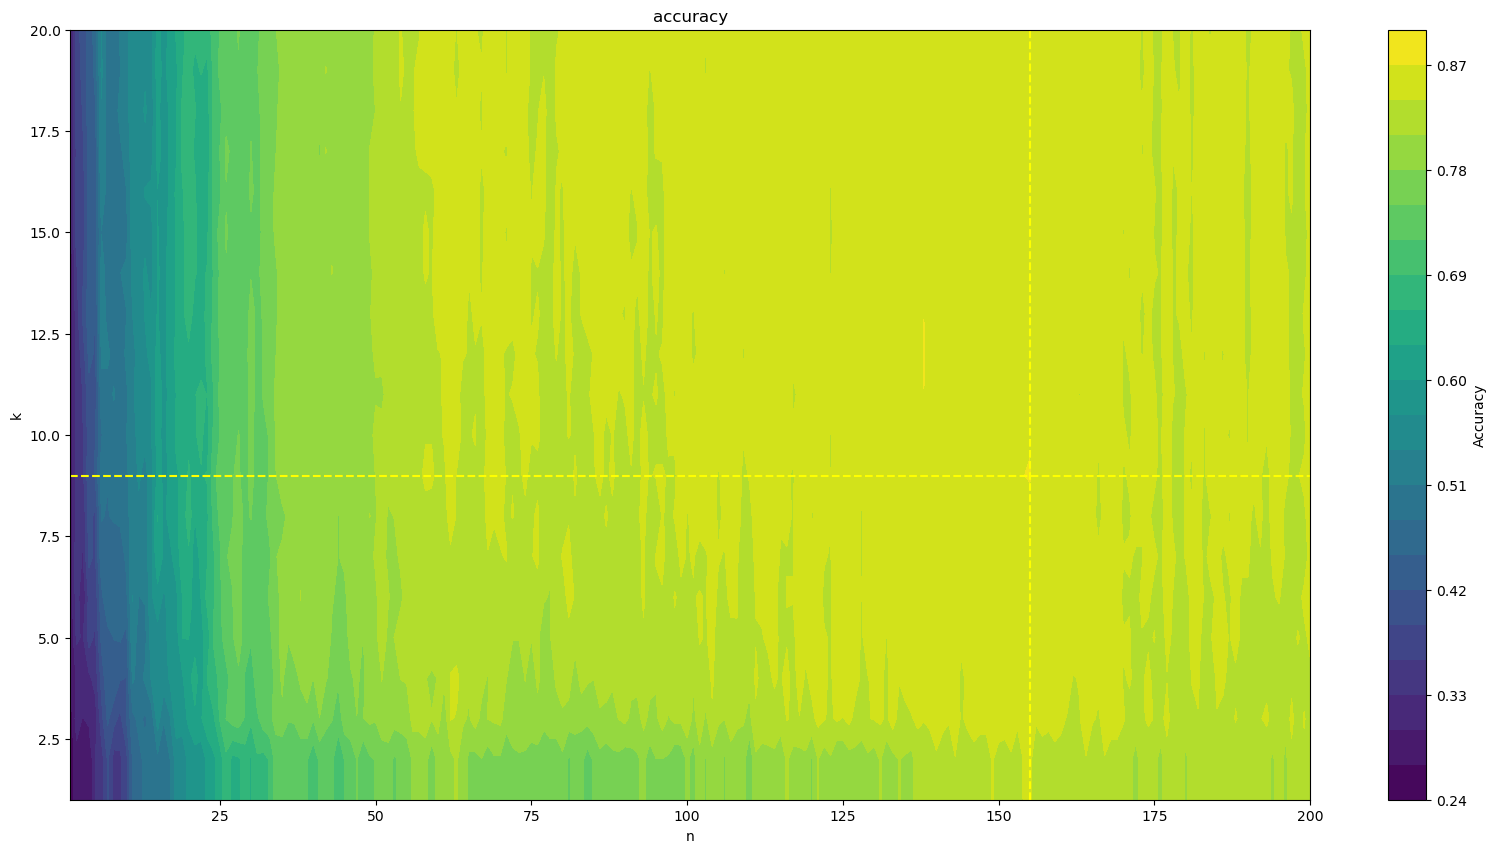

In [21]:
import matplotlib.pyplot as plt
import numpy as np

k_vals = np.arange(1, 21)
n_vals = np.arange(1, 201)
scores = np.array(score_array).reshape(20, 200)

N, K = np.meshgrid(n_vals, k_vals)
fig, ax = plt.subplots(figsize = (20, 10))
cs = ax.contourf(N, K, scores, levels=20)
fig.colorbar(cs, ax=ax, label='Accuracy')
ax.axhline(y=9, color='yellow', linestyle='--')
ax.axvline(x=155, color='yellow', linestyle='--')
ax.set_xlabel('n')
ax.set_ylabel('k')
ax.set_title('accuracy')
plt.show()



## END OF ASSIGNMENT